# A little statistics

## 1) Converting a probability into a 'sigma'. As discussed in class, 'sigma' refers to a probability in physics. Our first task is to figure out how, given a probability, to calculate the assoicated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and stard deviation of 1). As we discussed in class, integrals of the standard normal distribution give probabilities.  


### A) Look up the Normal distribution and read about it.  
Here is what a Z table looks like for z >= 0:  
![Z-Table](positiveztable.png)


### B) As in class, try integrating the standard normal distribution. This can be done either with the erfc(), or calls to specific statistical cumulative probability distributions such as normcdf() in MatLab or stats.norm.cdf() in scipy. Try several values of sigma, and make sure you are getting values that match the z-table.

0.5


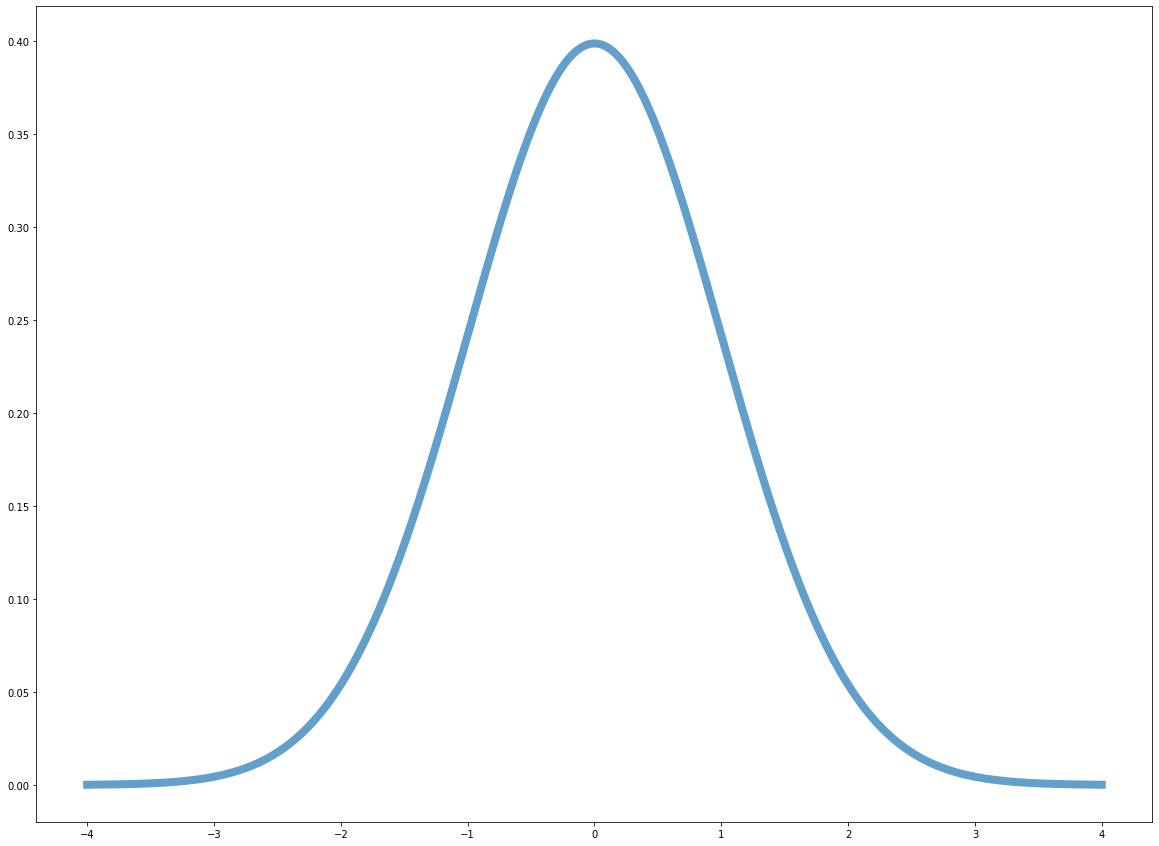

In [15]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)  
fig, ax = plt.subplots(1, 1)
x = np.linspace(-4,4,1000)

# integrates the normal distribution function from -inf to 0
# is equal to 0.5 because -inf to 0 is half the function
print(stats.norm.cdf(0, loc=0, scale=1))
ax.plot(x, stats.norm.pdf(x, loc=0, scale=1),linewidth = 8,alpha =0.7)
plt.show()

In [27]:

# now if we go from -inf to 1, we get 0.841, which matches our z table value
print(stats.norm.cdf(1, loc=0, scale=1))

0.8413447460685429


0.6914624612740131


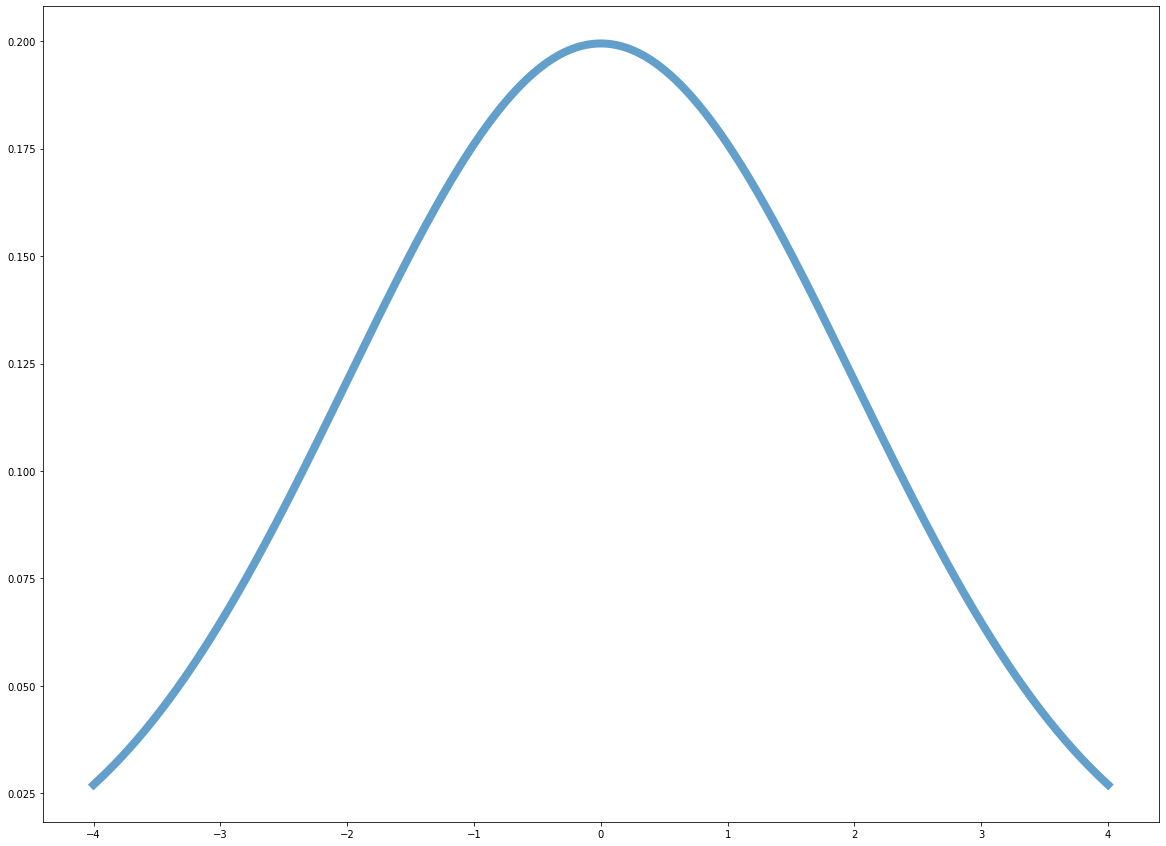

In [32]:

fig, ax = plt.subplots(1, 1)
x = np.linspace(-4,4,1000)

# now if we change scale (the standard deviation of our distribution), the shape of the distribution will be stretched or contracted by a factor of the standard deviation
# if we now integrate from -inf to 1, we are only going to half a standard deviation instead of a full deviation
# thus our z score is 0.5 which corrospondes to about 0.69 on our table.
print(stats.norm.cdf(1, loc=0, scale=2))
ax.plot(x, stats.norm.pdf(x, loc=0, scale=2),linewidth = 8,alpha =0.7)
plt.show()

### C) Now more often than not, we actually want to do the inverse: for a given probability determine the associated 'sigma' value: norminv() or erfcinv() in MatLab; stats.norm.ppf() in python. Try several probability values where you know what the answer should be (e.g. Probability associated with 1, 2, 5 sigma), and show that you get the right answer in terms of sigma.

In [33]:
# a probability of 50% (0.5) should corrospond to a location of 0
stats.norm.ppf(0.5, loc=0, scale=1)

0.0

In [39]:
# according to the 68-95-99 rule, a probability of 84% (68% of the data lives within 1 standard deviation, so 34% lives between 0 and 1) should give a location of about 1
stats.norm.ppf(0.84, loc=0, scale=1)

0.994457883209753

In [50]:
# riffing on the previous calculation, about 97.5% should be below 2 standard deviations
stats.norm.ppf(0.975, loc=0, scale=1)

1.959963984540054

In [55]:
# again, about 99.85% of data should be below 3 standard deviations
stats.norm.ppf(0.9985, loc=0, scale=1)

2.9677379253417944

## 2) Now let's explore some other continuous analytic distributions. Following the pattern from your first HW assigment, make both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time don't use the Gaussian. Choose one of the following distributions: Rayleigh; Lognormal; Chi-Squared or Gamma; Exponential. You and your partner should choose different distributions.  
  
### All of this question will be about Exponential distribution  
  
#### A) Read up on your distribution
Exponential distributions are characterized by a probability density function that is 0 when $x < 0$ and equal to $\lambda e^{-\lambda x}$ for $x \geq 0$.  By integrating this funciton, one arrives at a cumulative distribution function of $F(x) = 0$ for $x < 0$ and $1-e^{-\lambda x}$ for $x \geq 0$.  The characteristic parameter, $\lambda$, is only valid when strictly greater than 0. This parameter is refered to as the *rate parameter* because it controls how quickly the PDF approaches 0. When $\lambda$ is small, it slows how fast the distribution approaches 0 probability, which implies that it has a lower probability near 0.  As the parameter grows, the distribution function shows a sharper decline, but starts higher when close to 0.  
  
The exponential distribution commonly occurs in physics when modeling events that have a roughly equal distribution accross a time interval.  An example of such a scenario is the decay of particles.  This distribution also models the distribution of a uniform gas in a gravity well.  
  
#### B) Make plots (tweaking distribution and plot parameters as needed)

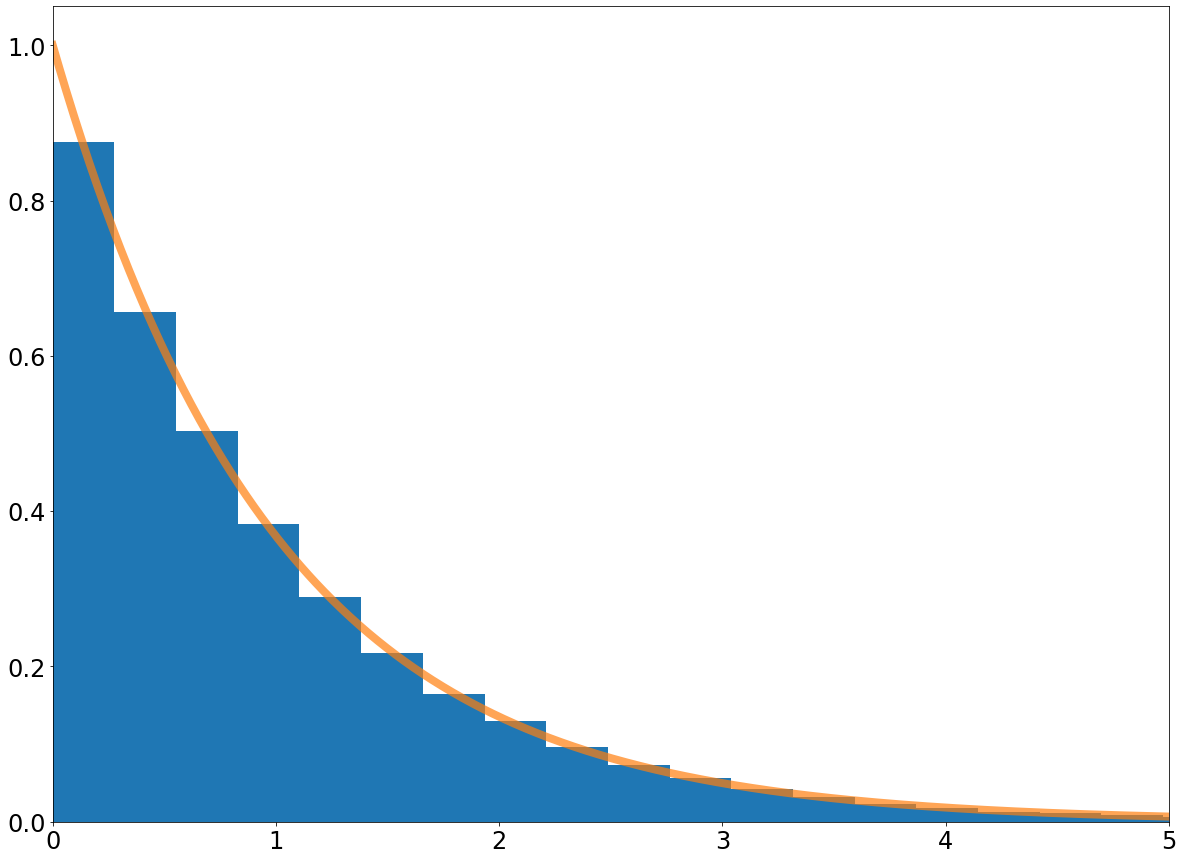

In [66]:
# Standard exponential distribution with a rate parameter of 1

d = stats.expon.rvs(loc=0, scale=1, size=100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.expon.pdf(x, loc=0, scale=1), linewidth = 8, alpha = 0.7)
plt.show()

**Graphing the log scale exponential distribution**  
This will produce a linear graph since $\log(\lambda e^{-\lambda x}) = \log(\lambda) - \lambda x \log(e)$

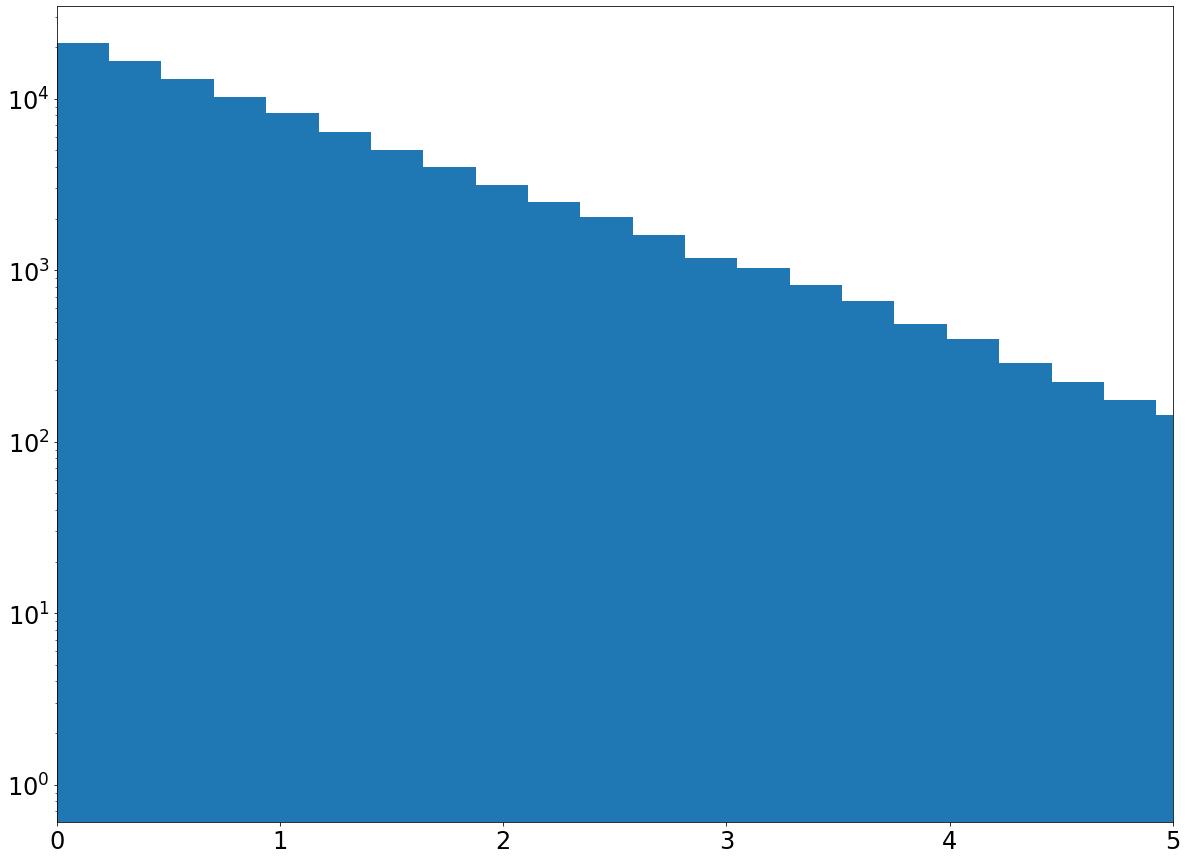

In [64]:
ax = plt.hist(d,50)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
plt.show()

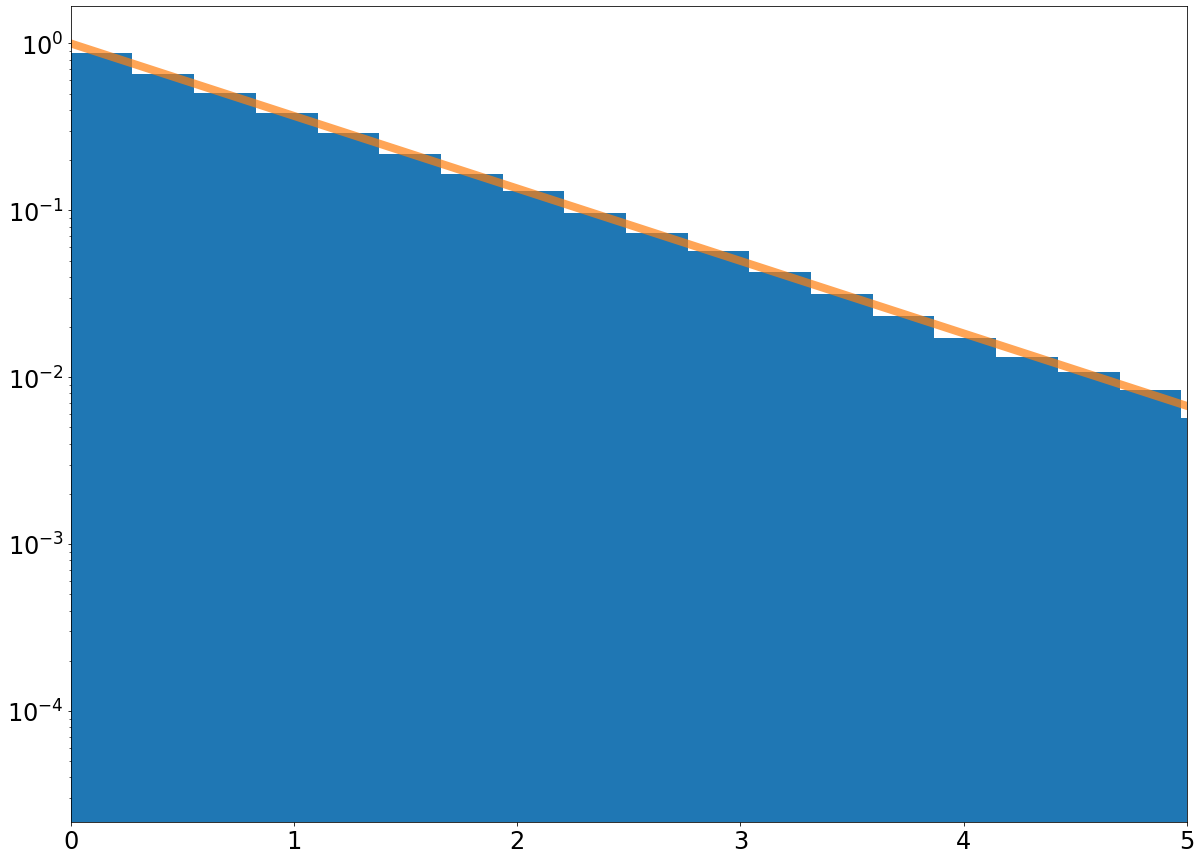

In [67]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5.,1000)
ax.plot(x,stats.expon.pdf(x, loc=0, scale=1),linewidth = 8,alpha = 0.7)
plt.show()